# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
from sklearn.decomposition import PCA

# Generate Data

In [37]:
random.seed(0)
k = 5
max_dist_btw_mean = 5
max_std = 2
features = 10
samples = 5000
delta = 2
means = [random.randint(max_dist_btw_mean*(i), ((max_dist_btw_mean*(i+1))-1)) for i in range (k)]
stds = [random.random()*max_std for i in range(k)]
print('means =', means)
print ('STDs =', stds)

means = [3, 8, 10, 17, 24]
STDs = [0.9718553931256253, 1.8364686635702636, 1.659705807317983, 1.9355999898403429, 0.7160987493899766]


In [38]:
data = []
for i in range (samples):
    mean = random.choice(means)
    index = means.index(mean)
    std = stds[index]   
    data.append(np.random.normal(mean,std, size=features))
numpy_data =np.array(data)

In [39]:
df = pd.DataFrame(data, columns=['Feature {:2d}'.format(i)for i in range(features)])
df.head()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,9.443790,8.972289,8.993243,9.034242,6.696437,7.178376,7.786755,5.936696,9.480524,3.807360
1,22.582420,23.193420,23.304606,23.216770,24.978527,23.617665,23.037707,23.783759,22.783463,22.751509
2,9.617343,9.615300,8.402546,7.512244,7.610382,5.759954,9.834501,9.557964,9.834157,10.210223
3,9.024677,12.936072,11.369692,8.400066,11.885257,13.572426,10.242193,9.633882,9.243970,9.084842
4,7.129265,6.635663,8.606662,7.700694,7.034404,7.327834,7.866228,8.626509,7.818284,6.253989


# Visualize Data

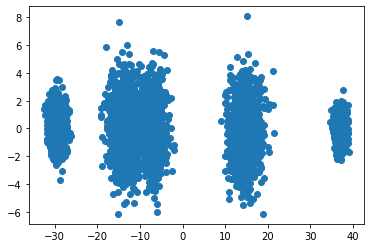

In [40]:
pca = PCA(2)
pca_numpy_data = pca.fit_transform(numpy_data)
plt.scatter(pca_numpy_data[: , 0] , pca_numpy_data[: , 1] )

# K Means Clustering

## Functions

In [41]:
def getEuclideanDistance(data,center):
    return np.sqrt(np.sum(((data-center)**2),1))
    
def getManhattanDistance(data,center):
    return np.sqrt(np.sum((np.abs(data-center)),1))

def getSSE(data,centers,labels):
    sse = 0
    for i in range(centers.shape[0]):
        sse += np.sum(((data[labels==i]-centers[i])**2))
    return sse

def calc_distances(data,centers, dist_type='euclidean'):
    distance = []
    for i, c in enumerate(centers):
        if dist_type=='euclidean':
            dist = getEuclideanDistance(data,c)
        elif dist_type=='manhattan':
            dist = getEuclideanDistance(data,c)
        distance.append(dist)
    return distance
    
def find_label(distance):
    labels = np.argmin(distance,0)
    return labels

def update_centers(data,labels,k,centers):
    new_centers =[]
    for i in range(k):
        if len(data[labels==i])==0:
            new_centers.append(centers[i])
        else:
            new_centers.append(np.mean(data[labels==i],0))
    return np.array(new_centers)

def initialize_centers(data,k):
    centers = []
    for i in range(k):
        centers.append(data[random.randint(0,samples-1)])
    centers = np.array(centers)
    return centers

def k_means_fit(data,k,metric='euclidean'):
    centers = initialize_centers(data,k)
    i = 0
    while True:
        distances = calc_distances(data,centers,metric)
        labels = find_label(distances)
        new_centers = update_centers(data,labels,k,centers)
        i = i+1
        if np.sum(new_centers-centers)==0:
            break
        else:
             centers = new_centers
    sse = getSSE(data,centers,labels)
    return new_centers,labels,sse,i

## Applying K Means

In [44]:
centers,labels,sse,iterations = k_means_fit(numpy_data,5)
print(sse)

113581.33481179223


## Visualize Data After K Means

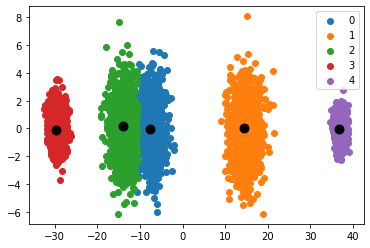

In [45]:
pca1 = PCA(2)
#pca2 = PCA(2)
#Transform the data
pca_numpy_data = pca1.fit_transform(numpy_data)
u_labels = np.unique(labels)

#Transform the centers
pca_centers = pca1.fit_transform(centers)

for i in u_labels:
    plt.scatter(pca_numpy_data[labels == i , 0] , pca_numpy_data[labels == i , 1] , label = i)
plt.scatter(pca_centers[:,0] , pca_centers[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

# Sum of Squared errors (SSE)

In [16]:
ks = [i for i in range (2,20)]

## For euclidean distance

In [27]:
SSE = []
for k in ks:
    _,_,sse,_ = k_means_fit(numpy_data,k,'euclidean')
    SSE.append(sse)

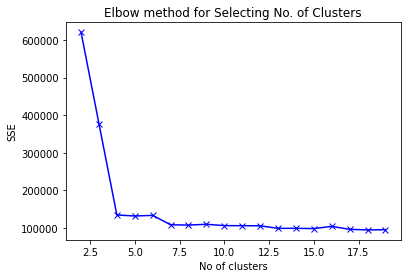

In [28]:
plt.plot(ks, SSE, 'bx-')
plt.title('Elbow method for Selecting No. of Clusters')
plt.xlabel('No of clusters')
plt.ylabel('SSE')
plt.show()

## For Manhattan Distance

In [31]:
SSE = []
for k in ks:
    _,_,sse,_ = k_means_fit(numpy_data,k,'manhattan')
    SSE.append(sse)

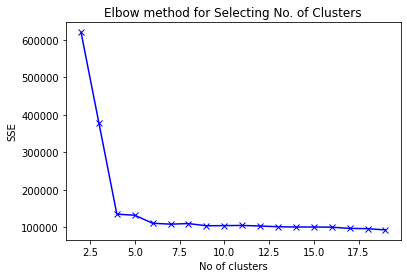

In [32]:
plt.plot(ks, SSE, 'bx-')
plt.title('Elbow method for Selecting No. of Clusters')
plt.xlabel('No of clusters')
plt.ylabel('SSE')
plt.show()